# Python project van Thije Wissema
In dit programma laat ik zien dat ik al een boel van python begrijp door hier een geavanceerd programma te schrijven. Hierbij zal ik jupyter notebook gebruiken zoals us ziet. Jupyter notebook  is een niet standaard programma en dis kan het ruwe bestand niet makkelijk ingelezen worden. daarom zal ik het uploaden naar mijn Github pagina.

## Over jupyter notebook
Jupyter notebook is een web based coding tool die gefocussed is op stapsmatig programmeren en grafish weergeven van data. De voornaamste taal die wordt gebruikt is python maar er is compatibiliteit met meerdere talen zoals c++, julia, GNU Octave, R, Ruby en scheme. Meer informatie kan je op [hun website](https://jupyter.org/) vinden.

## Waarom Jupyter
In Jupyter kan ik stapmatig programmeren en stapsgewijs uitleggen wat er in de code gebeurd. Dit laat meer zien over mijn kennis over het project.

## over het project
In dit project laat ik zien dat ik data kan analyseren en visualiseren. Hiervoor heb ik een CSV bestand met data van het RIVM verkregen vanaf [deze](https://data.rivm.nl/covid-19/) website. deze data zal ik op datum uitplotten over het aantal positieve testresultaten per week vanaf de week 2022-11-02 tot de week 2024-08-28.

In [2]:
# imports pandas and matplotlib

import matplotlib.pyplot as plt
import pandas as pd

## voorbereiding
om de data te visualiseren moet eerst de data worden opgeslagen in objecten. hiervoor gebruik ik [pandas](https://pandas.pydata.org/)

In [3]:
df = pd.read_csv("covidresultaten.csv", sep=";")
display(df)

,Version,Date_of_report,Date_of_statistics,Perc_covid_test_positive
0,1,2024-08-28,2020-11-02,"0,4"
1,1,2024-08-28,2020-11-09,"0,4"
2,1,2024-08-28,2020-11-16,"0,3"
3,1,2024-08-28,2020-11-23,"0,3"
4,1,2024-08-28,2020-11-30,"0,3"
...,...,...,...,...
194,1,2024-08-28,2024-07-22,"1,7"
195,1,2024-08-28,2024-07-29,"1,2"
196,1,2024-08-28,2024-08-05,"0,8"
197,1,2024-08-28,2024-08-12,"0,8"


## over de tabel
* version: 
  Dit is het versienummer van de tabel, dit is onbelanrijke data voor dit project
* date_of_report: 
  Dit is de datum dat de tabel voor het laatst is bijgewerkt. Dit is ook onbelangrijke data.
* data_of_statistics: 
  Dit geeft de datum aan van de rij dat de andere kolommen naar refereren.
* Perc_covid_test_positive: 
  Dit is het percentage van deelnemers met een  positieve testuitslag voor SARS-CoV-2 (zelftest en/of PCR-test) uit het totaal aan unieke deelnemers aan Infectieradar die een vragenlijst heeft ingevuld. Voor de funtie van dit programma ga ik uit van 60.000 mensen die deze vragenlijst hebben ingevuld(60.000 is het laatse getal wat ik heb kunnen vinden over het aantal aanmeldingen voor infectieradar).

## volgende stappen
Er zijn twee stappen om uit te voeren
* de kolommen versie en date_of_report moeten gedropt worden wegen de nutteloze data is het beter om deze te verwijderen om het programma efficienter te maken
* een rij bijvoegen met het aantal positieve testresultaten. deze wordt ingevult doormiddel van de volgende formule: 60000*(Perc_covid_test_positive/100)

In [4]:
# drops columns in the dataframe

df = df.drop(columns=["Version", "Date_of_report"])

data = [round(60000*(float(i.replace(",", "."))/100)) for i in df['Perc_covid_test_positive']]

# adds the column Amount_test_positive
df.insert(2, "Amount_test_positive", data)
display(df)

,Date_of_statistics,Perc_covid_test_positive,Amount_test_positive
0,2020-11-02,"0,4",240
1,2020-11-09,"0,4",240
2,2020-11-16,"0,3",180
3,2020-11-23,"0,3",180
4,2020-11-30,"0,3",180
...,...,...,...
194,2024-07-22,"1,7",1020
195,2024-07-29,"1,2",720
196,2024-08-05,"0,8",480
197,2024-08-12,"0,8",480


## uitplotten van grafieken
Voor het uiplotten van de data die hierboven is bewerkt zal ik matplotlib gebruiken. Dit is een python bibliotheek die is gemaakt voor data visualisatie. Meer informatie kan [hier](https://matplotlib.org/stable/) gevonden worden.

## aanpak in dit project
In matplotlib geef je een met de .plot() methode een x-as en een y-as aan. Omdat we met panda's werken kan ik direcht de hele lijst uit de gebouwde datafrom halen. Vanwege de limiet van de afbeelding is het handig om niet alle datums op de x-as te tonen ```plt.xticks([])``` wordt hiervoor Gebruikt. vervolgens willen we labels geven aan de assen waarvoor ```plt.xlabel()``` en ```plt.ylabel()``` wordt gebruikt.

Als laatst wordt de grafiek getoond met ```plt.show()```

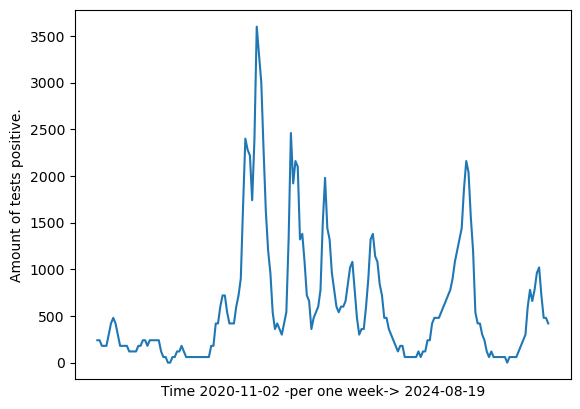

In [18]:
plt.plot(df['Date_of_statistics'], df['Amount_test_positive'])
plt.xticks([])
plt.xlabel('Time 2020-11-02 -per one week-> 2024-08-19')
plt.ylabel('Amount of tests positive.')
plt.show()